In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis - New Covid-19 Cases in China and the US

##### Data source and summary: It is the first Exploratory Data Analysis session about Covid-19 cases. The WHO coronavirus (COVID-19) dataset presents Covid-19 related data reported by different countries on daily-basis, including the attributes of Covid-19 case, deaths and vaccine utilisation. According to the official documentation of WHO, all data are subject to variations in case detection, definitions, laboratory testing, vaccination strategy, and reporting strategies. It is also noted that the daily counts of COVID-19 confirmed cases and deaths reported to WHO headquarters on Saturdays and Sundays have been updated on this dataset on the following Monday, starting from 19 June 2021. Nevertheless, given continued volatility in daily count data,a long term trend have been used in one of the following graphs as a more reliable measure of Covid-19 epidemiological activity and trend within China and the US.

##### Data definition: Counts reflect laboratory-confirmed cases and deaths, which include both domestic and repatriated cases. Case detection, definitions, testing strategies, reporting practice, and lag times (e.g. time to case notification, and time to reporting of deaths) differ between countries, territories and areas. Although all data are subject to continuous verification by WHO, these factors are still under consideration to cause under or overestimation of true case and death counts. By definition, counts of new cases and deaths are calculated by subtracting previous cumulative total counts from the current count.

Link of data source: https://covid19.who.int/data 

In [7]:
# Read the dataset about covid-19 health data from World Health Organization (WHO) using Pandas. 
df = pd.read_csv('./Data/WHO-COVID-19-global-data.csv',encoding='utf-8')
df = df.drop(columns=['Country_code','WHO_region','Cumulative_cases','Cumulative_deaths'])
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%Y-%m-%d')
df

,Date_reported,Country,New_cases,New_deaths
0,2020-01-03,Afghanistan,0,0
1,2020-01-04,Afghanistan,0,0
2,2020-01-05,Afghanistan,0,0
3,2020-01-06,Afghanistan,0,0
4,2020-01-07,Afghanistan,0,0
...,...,...,...,...
205474,2022-05-14,Zimbabwe,25,3
205475,2022-05-15,Zimbabwe,294,0
205476,2022-05-16,Zimbabwe,0,0
205477,2022-05-17,Zimbabwe,0,0


In [8]:
# df.info()

In [9]:
# check duplicated value, no duplicated values is found
df[df.duplicated()]

,Date_reported,Country,New_cases,New_deaths


##### Concerning the volatility in daily count data, the weekly data was aggregated by summing up the data weekly (7 days) using Groupby function, so that the line chart could be smoothed and a long term trend (several weeks) could be presented with more accurate data. Meanwhile, given that the Covid-19 new cases in China has increased dramatically as a peak in early 2022, it is difficult to spot out the relative lower amount of data in 2020 and 2021 on one graph with same scale. As the solution, data preprocessing was undertaken here (i.e. log transformation). That is, all the data have been transformed by taking natural logarithm to facilitate the visualization. It is noted that log transforms are popular with time series data as they are effective at removing exponential variance.

In [10]:
# Retreive covid-19 data from China and converting daily data into weekly data using Grouper function
df_covid_China = df[df['Country']=='China']
df_covid_China = df_covid_China.groupby(pd.Grouper(key='Date_reported',freq='7D',axis=0, sort=True)).sum()
# replace 0 in case of any infinite and null value to avoid error in data preprocessing and following  analysis
df_covid_China = df_covid_China.replace((np.inf,-np.inf,np.nan,-np.nan),0)
df_covid_China.tail()

,New_cases,New_deaths
Date_reported,,
2022-04-15,36074,265
2022-04-22,53124,358
2022-04-29,136429,287
2022-05-06,306423,159
2022-05-13,392796,204


New_cases     3.123700e+09
New_deaths    1.181497e+05
dtype: float64

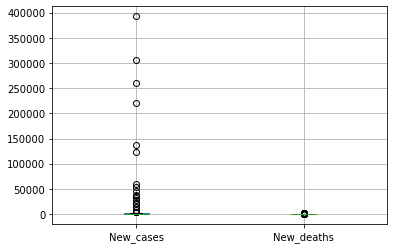

In [13]:
df_covid_China.boxplot()       # showed a large scale of values in new cases
df_covid_China.var()      # showed a extreme high variance in new cases

#### Log transformation is taken because of the high variance and large scale of values in Covid-19 new cases.
Log transformatoin is used instead of scaling, because it's difficult to explain the algorithm behind the function 'standard scaler' from skearn library. Also, the mean and standard deviation of different dataset are not the same, which may cause different shape and pattern in different graphs and hard to spot out the difference if we used scaling. Hence, log transformation is adopted here to display the change of data.

In [ ]:
# Use Numpy to transform data into log
df_covid_China=np.log(df_covid_China)
df_covid_China.to_csv('./Data/df_covid_China.csv',encoding='utf-8')
df_covid_China.tail()

/Users/daniel/opt/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,New_cases,New_deaths
Date_reported,,
2022-04-15,10.493328,5.579730
2022-04-22,10.880384,5.880533
2022-04-29,11.823560,5.659482
2022-05-06,12.632722,5.068904
2022-05-13,12.881046,5.318120


Similar data preprocessing work done for US here

In [ ]:
# Retreive covid-19 data from US 
df_covid_US = df[df['Country']=='United States of America']
# Converting daily data to weekly data using Groupby and Grouper function
df_covid_US = df_covid_US.groupby(pd.Grouper(key='Date_reported',freq='7D',axis=0, sort=True)).sum()
# replace 0 in case of any infinite and null value to avoid error in data preprocessing and following  analysis
df_covid_US = df_covid_US.replace((np.inf,-np.inf,np.nan,-np.nan),0)
df_covid_US.tail()

,New_cases,New_deaths
Date_reported,,
2022-04-15,278009,2698
2022-04-22,334114,2211
2022-04-29,408226,2465
2022-05-06,516223,2166
2022-05-13,549007,1530


In [ ]:
# Transform data by taking natural logarithm of the values
df_covid_US = np.log(df_covid_US)
df_covid_US.to_csv('./Data/df_covid_US.csv',encoding='utf-8')
df_covid_US.tail()

/Users/daniel/opt/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,New_cases,New_deaths
Date_reported,,
2022-04-15,12.535409,7.900266
2022-04-22,12.719238,7.701200
2022-04-29,12.919576,7.809947
2022-05-06,13.154294,7.680637
2022-05-13,13.215866,7.333023


#####  The following graph illustrated the new Covid-19 cases in China and the US from 2020 to 2022 in weekly basic. Each data point on the curve represents the total amount of new cases for each week. It is shown that China has higher amount of new Covid-19 cases than US before 2020 Apr. After that, US has more new Covid-19 cases than China continuously up to 2022 Apr. 

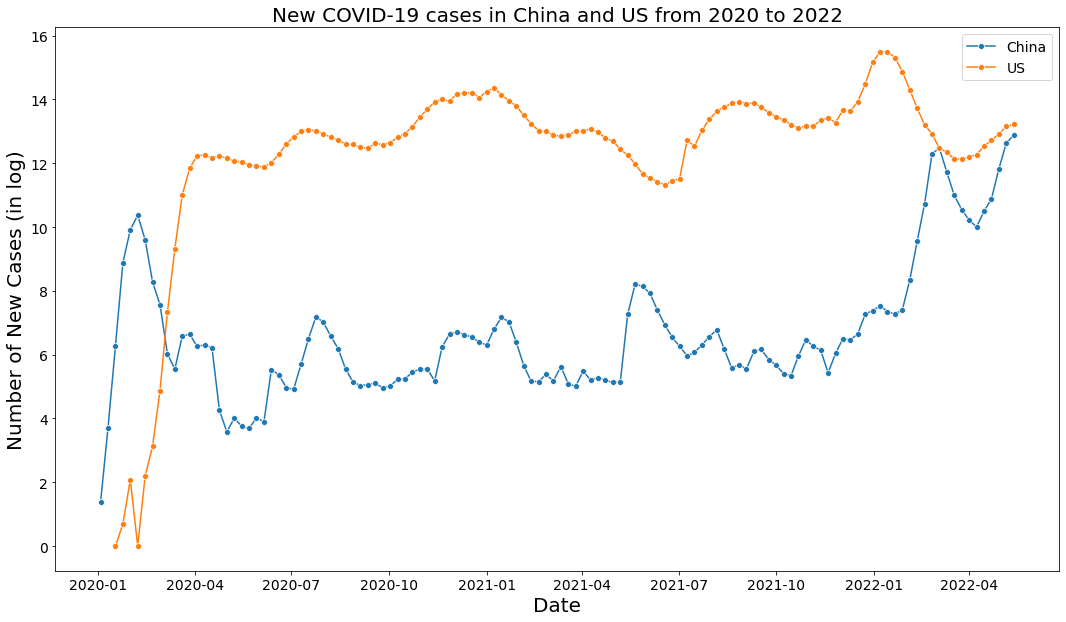

In [ ]:
# Use seaborn to plot the linechart of new covid-19 cases in China and US from 2020 to 2022 with logged data
plt.figure(figsize=(18,10))
sns.lineplot(x='Date_reported',y='New_cases',data=df_covid_China, palette='bright',marker='o')
sns.lineplot(x='Date_reported',y='New_cases',data=df_covid_US, palette='bright',marker='o')
plt.title('New COVID-19 cases in China and US from 2020 to 2022', fontsize=20)
plt.legend(['China','US'],fontsize=14)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of New Cases (in log)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show() 

## Explortary Data Analysis - Covid-19 Government Response Tracker (OxCGRT)

##### Data source and summary: It is the second explortatary data analysis session which is about Covid-19 restriction data. The Oxford Covid-19 Government Response Tracker (OxCGRT) collects systematic information on policy measures that governments have taken to tackle COVID-19. Different policy responses are tracked since 1 January 2020, cover more than 180 countries and are coded into 23 indicators, such as school closures, travel restrictions, vaccination policy. The scale of policies are recorded to reveal the extent of government action against Covid-19 (i.e. the number and strictness of government policies). However, a higher score in the index does not necessarily mean that a country's reasponse is 'better' than other lower score on the index, as this index is not intended to interprete the appropriateness of effectiveness of a country's response, according to the official documentation of OxCGRT (https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker). Neverthess, the following barcharts imported from the dataset might not able to show a significant insight to us about the comparison of government's response in China and US due to the consistent data in every year. 

##### Data definition: This composite measure is a simple additive score of nine indicators measured on an ordinal scale, rescaled to vary from 0 to 100. It also includes a 'COVID-19 Containment and Health Response' index which incorporated testing policy, contact tracing, face coverings and vaccine policy. Some examples of policy and response metrics are shown below: 
Workplace closures:

0. No measures
1. recommend closing (or work from home)
2. require closing (or work from home) for some
sectors or categories of workers
3. require closing (or work from home) all but essential workplaces (e.g. grocery stores, doctors)
No data - blank

Cancel public events: 

0. No measures 
1. Recommend cancelling 
2. Require cancelling No data - blank 

Restrictions on gatherings:

0. No restrictions
1. Restrictions on very large gatherings (the limit is above 1,000 people)
2. Restrictions on gatherings between 100-1,000 people
3. Restrictions on gatherings between 10-100 people
4. Restrictions on gatherings of less than 10 people
No data - blank

Face coverings:

0. No policy
1. Recommended
2. Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible
3. Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible
4. Required outside the home at all times, regardless of location or presence of other people

Link of data source: https://ourworldindata.org/grapher/public-gathering-rules-covid?time=2022-04-13 

In [ ]:
# read the main dataset about Covid-19 Restriction Gathering  data from csv
df_res = pd.read_csv('./Data/public-gathering-rules-covid.csv',encoding='utf-8')
df_res['Day'] = pd.to_datetime(df_res['Day'])
df_res = df_res.rename(columns={"Day": "Date"})
# df_restriction['Month'] = df_restriction['Day'].dt.month.astype(int)
# df_restriction = df_restriction.groupby(['Entity','Month'])['restriction_gatherings'].count().reset_index()
df_res

,Entity,Code,Date,restriction_gatherings
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
159041,Zimbabwe,ZWE,2022-05-13,3
159042,Zimbabwe,ZWE,2022-05-14,3
159043,Zimbabwe,ZWE,2022-05-15,3
159044,Zimbabwe,ZWE,2022-05-16,3


In [ ]:
# Converting daily data to weekly data using Grouper function
df_res_China = df_res[df_res['Entity']=='China']
df_res_China = df_res_China.groupby(pd.Grouper(key='Date',freq='7D',axis=0, sort=True)).mean()
df_res_US = df_res[df_res['Entity']=='United States']
df_res_US = df_res_US.groupby(pd.Grouper(key='Date',freq='7D',axis=0, sort=True)).mean()
df_res_China.head()

,restriction_gatherings
Date,
2020-01-01,0.0
2020-01-08,0.0
2020-01-15,0.0
2020-01-22,4.0
2020-01-29,4.0


Used linechart instead of barchart as all the data points are so similar through out the 3 years and it is difficult to spot out the difference when using barchart. It had been expected that China has higher extent of government response against Covid-19 when compared with the US. However, this composite index is so comprehensive which included a wide range of factors like school measures, workplace closures, travel restrictions and face covering policy. For example, we expeceted china has a more stringent policy, but it is rare to issue Work from Home (WFH) policy in China due to the cultual difference, whilst WFH policy is very common worldwide nowadays. Hence, all these considerations and the unexpected result emerged as the limitation in this project. 

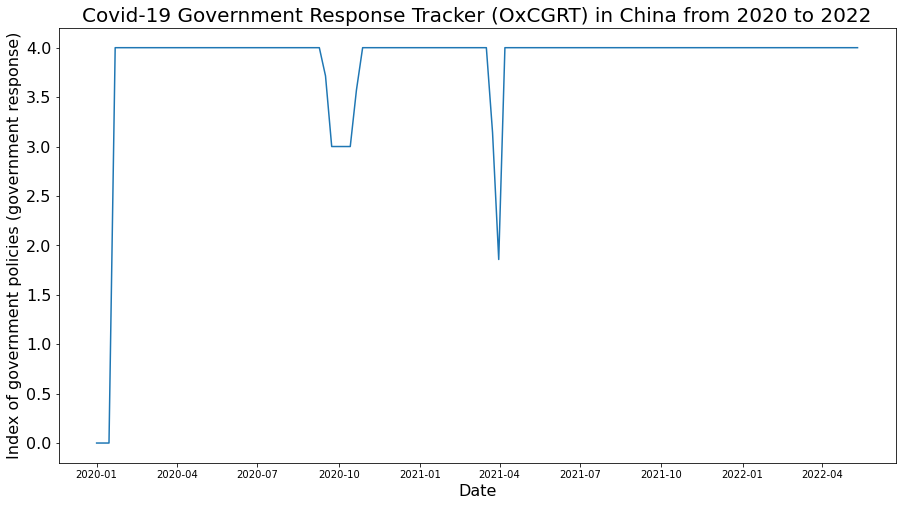

In [ ]:
# Use seaborn to plot a linechart about the number of restrictions on public gatherings per month in China from 2020 to 2022
plt.figure(figsize=(15,8))
sns.lineplot(x=df_res_China.index,y='restriction_gatherings', data=df_res_China)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Index of government policies (government response)',fontsize=16)
plt.yticks(fontsize=16)
plt.title('Covid-19 Government Response Tracker (OxCGRT) in China from 2020 to 2022', fontsize=20)
plt.show()

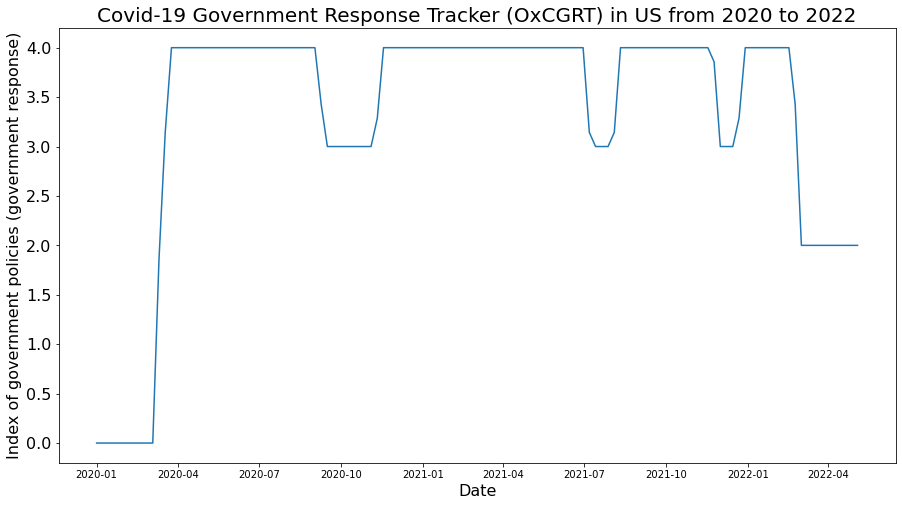

In [ ]:
# Use seaborn to plot a barchart about the number of restrictions on public gatherings per month in US from 2020 to 2022
plt.figure(figsize=(15,8))
sns.lineplot(x=df_res_US.index,y='restriction_gatherings', data=df_res_US)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Index of government policies (government response)',fontsize=16)
plt.yticks(fontsize=16)
plt.title('Covid-19 Government Response Tracker (OxCGRT) in US from 2020 to 2022', fontsize=20)
plt.show()

## Explortary Data Analysis - Stock Market Price of the 15 Largest tech companies by market cap

Link of data source: https://pypi.org/project/yfinance/

In [ ]:
# Chose the 15 biggest tech companies in the US and China according to its market cap
stock_list_US = "AAPL MSFT GOOG AMZN TSLA FB NVDA AVGO ADBE CRM ORCL CSCO INTC AMD SPY NDX NFLX ZM SHOP FNGU"

# some stock data (i.e. 6618.HK, LU, DIDI and SMIC do not exist or listed on market after Jan 2020
stock_list_China = "TCEHY BABA 3690.HK JD PDD NTES BIDU TCOM BILI 600588.SS FXI KWEB"   

In [ ]:
# read the main dataset about stock data from yahoo finance
import yfinance as yf
df_stock_US = yf.download( 
        tickers = stock_list_US,
        start="2020-01-01", end="2022-05-19",
        interval = "1d",
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )
df_stock_China = yf.download( 
        tickers = stock_list_China,    
        start="2020-01-01", end="2022-05-19",
        interval = "1d",
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  12 of 12 completed


In [ ]:
# select adjacent closing price from US market dataset
df_stock_US = df_stock_US['Adj Close']
df_stock_US.tail()

,AAPL,ADBE,AMD,AMZN,AVGO,CRM,CSCO,FB,FNGU,GOOG,INTC,MSFT,NDX,NFLX,NVDA,ORCL,SHOP,SPY,TSLA,ZM
Date,,,,,,,,,,,,,,,,,,,,
2022-05-12,142.559998,388.489990,87.059998,106.930496,566.870422,160.419998,47.859245,191.240005,7.84,113.161003,42.840000,254.756653,11945.500000,174.309998,161.715820,70.415077,35.351002,390.652496,728.000000,84.970001
2022-05-13,147.110001,405.450012,95.120003,113.055000,583.403320,166.910004,49.117916,198.619995,9.09,116.515503,43.599998,260.513245,12387.400391,187.639999,177.022568,70.853119,40.248001,399.992157,769.590027,94.839996
2022-05-16,145.539993,402.859985,94.239998,110.810501,577.879150,164.119995,48.562912,200.039993,8.72,114.792503,43.080002,260.892365,12243.580078,186.509995,172.603516,69.399620,35.994999,398.369171,724.369995,88.919998
2022-05-17,149.240005,409.649994,102.470001,115.368500,603.149658,163.729996,50.148636,202.619995,9.63,116.701500,44.400002,266.200012,12564.099609,190.559998,181.731583,71.559952,37.264000,406.563782,761.609985,90.940002
2022-05-18,140.820007,397.880005,96.279999,107.112503,565.878662,157.330002,47.928619,192.240005,8.10,112.401001,42.349998,254.080002,11928.309570,177.190002,169.344208,67.995903,36.062000,390.174530,709.809998,84.690002


In [ ]:
df_stock_US.info()      # check null value, no missing values is found

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-01-02 to 2022-05-18
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    600 non-null    float64
 1   ADBE    600 non-null    float64
 2   AMD     600 non-null    float64
 3   AMZN    600 non-null    float64
 4   AVGO    600 non-null    float64
 5   CRM     600 non-null    float64
 6   CSCO    600 non-null    float64
 7   FB      600 non-null    float64
 8   FNGU    600 non-null    float64
 9   GOOG    600 non-null    float64
 10  INTC    600 non-null    float64
 11  MSFT    600 non-null    float64
 12  NDX     600 non-null    float64
 13  NFLX    600 non-null    float64
 14  NVDA    600 non-null    float64
 15  ORCL    600 non-null    float64
 16  SHOP    600 non-null    float64
 17  SPY     600 non-null    float64
 18  TSLA    600 non-null    float64
 19  ZM      600 non-null    float64
dtypes: float64(20)
memory usage: 98.4 KB


In [ ]:
# select adjacent closing price from Chinese market dataset
df_stock_China = df_stock_China['Adj Close']
df_stock_China.tail()

,3690.HK,600588.SS,BABA,BIDU,BILI,FXI,JD,KWEB,NTES,PDD,TCEHY,TCOM
Date,,,,,,,,,,,,
2022-05-12,157.000000,18.719999,81.089996,107.879997,18.910000,28.218874,47.472260,24.879999,87.687057,34.230000,43.852409,19.490000
2022-05-13,167.600006,18.610001,87.989998,116.940002,20.600000,29.483448,50.281384,26.620001,92.173096,37.720001,45.723549,20.879999
2022-05-16,163.500000,18.680000,86.480003,117.800003,20.629999,29.443617,50.261879,26.680000,92.960640,37.840000,44.927319,20.980000
2022-05-17,173.699997,18.650000,91.989998,123.440002,21.129999,30.339769,52.349213,27.540001,94.306450,40.160000,46.549641,21.650000
2022-05-18,172.000000,18.840000,87.309998,118.860001,20.750000,29.493404,49.939999,26.700001,93.289619,38.590000,43.304996,21.530001


In [ ]:
# check if null value exist, i.e. 45 null values have been found in attribute '600588.SS'
df_stock_China.isnull().sum()

3690.HK      33
600588.SS    45
BABA         18
BIDU         18
BILI         18
FXI          18
JD           18
KWEB         18
NTES         18
PDD          18
TCEHY        18
TCOM         18
dtype: int64

In [ ]:
# simply deleted the missing values to keep the dataset simple
df_stock_China = df_stock_China.dropna()
df_stock_China.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541 entries, 2020-01-02 to 2022-05-18
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   3690.HK    541 non-null    float64
 1   600588.SS  541 non-null    float64
 2   BABA       541 non-null    float64
 3   BIDU       541 non-null    float64
 4   BILI       541 non-null    float64
 5   FXI        541 non-null    float64
 6   JD         541 non-null    float64
 7   KWEB       541 non-null    float64
 8   NTES       541 non-null    float64
 9   PDD        541 non-null    float64
 10  TCEHY      541 non-null    float64
 11  TCOM       541 non-null    float64
dtypes: float64(12)
memory usage: 54.9 KB


### Indexing Data to a Common Starting Point

In [ ]:
# Indexing Data for US stock market
df_stock_US_index = df_stock_US.copy()      # create a copy of dataset for indexing data

stock_list_US = stock_list_US.split(' ')
for stock in stock_list_US:
    if stock not in df_stock_US_index:
        print('some required stock data is not in downloaded dataset')
        break
    initial = df_stock_US_index[stock][0]
    for i in range(len(df_stock_US_index)):
        df_stock_US_index[stock][i] = (df_stock_US_index[stock][i]/initial)*100

df_stock_US_index.to_csv('./Data/df_stock_US_index.csv',encoding='utf-8')
df_stock_US_index       # show the indexing data

,AAPL,ADBE,AMD,AMZN,AVGO,CRM,CSCO,FB,FNGU,GOOG,INTC,MSFT,NDX,NFLX,NVDA,ORCL,SHOP,SPY,TSLA,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.027801,99.216579,98.981670,98.786097,97.456484,99.508948,98.368443,99.470874,97.101669,99.509273,98.783704,98.754818,99.117252,98.814468,98.399391,99.647807,99.136859,99.242783,102.963319,97.904537
2020-01-06,99.816880,99.784708,98.553973,100.256584,97.310704,103.868490,98.719557,101.344269,101.027448,101.962896,98.504295,99.010093,99.732872,101.825290,98.812036,100.166798,101.353576,99.621396,104.945843,102.328286
2020-01-07,99.347438,99.689030,98.268842,100.466283,96.975731,105.395529,98.079318,101.563542,103.174364,101.899267,96.860637,98.107319,99.709548,100.285013,100.008324,100.389249,101.640476,99.341292,109.017797,104.627474
2020-01-08,100.945564,101.028617,97.413449,99.681778,95.765984,106.191985,98.141265,102.593194,107.192146,102.702273,96.926385,99.670018,100.452541,102.865290,100.195903,100.780220,102.523242,99.870728,114.382001,105.573344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,193.207612,116.164817,177.311609,112.676434,192.185629,96.065628,106.756198,91.162173,120.226963,165.516288,75.189974,162.343565,134.639362,52.851642,270.411461,136.500185,86.684984,125.050808,846.000074,123.646682
2022-05-13,199.374105,121.236139,193.727099,119.130040,197.790765,99.952092,109.563825,94.680139,139.395802,170.422787,76.523874,166.011950,139.620081,56.893363,296.006483,137.349332,98.693026,128.040504,894.331345,138.009305
2022-05-16,197.246317,120.461679,191.934828,116.764932,195.917910,98.281328,108.325817,95.357038,133.721828,167.902621,75.611210,166.253544,137.999063,56.550740,288.617210,134.531713,88.264144,127.520974,841.781689,129.394640


In [ ]:
# Indexing Data for Chinese stock market
df_stock_China_index = df_stock_China.copy()      

stock_list_China = stock_list_China.split(' ')
for stock in stock_list_China:
    if stock not in df_stock_China_index:
        print('some required stock data is not in downloaded dataset')
        break
    initial = df_stock_China_index[stock][0]
    for i in range(len(df_stock_China_index)):
        df_stock_China_index[stock][i] = (df_stock_China_index[stock][i]/initial)*100

df_stock_China_index.to_csv('./Data/df_stock_China_index.csv',encoding='utf-8')
df_stock_China_index       

,3690.HK,600588.SS,BABA,BIDU,BILI,FXI,JD,KWEB,NTES,PDD,TCEHY,TCOM
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,100.676326,100.231334,98.739589,96.802201,105.393791,97.838679,100.689116,98.917241,98.770936,99.175357,98.295910,97.863130
2020-01-06,105.797101,101.288839,98.575782,98.350457,110.787581,98.306593,100.715610,99.439282,98.588394,97.235024,97.774651,96.537726
2020-01-07,106.666668,101.982823,99.026255,98.900301,110.405720,98.061489,101.563745,100.348027,99.796161,99.951491,99.799515,100.973764
2020-01-08,102.801934,101.321888,99.194611,99.717842,113.794746,97.994641,101.510735,100.986075,100.702794,98.229446,99.538897,99.729504
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,151.690821,81.806732,36.897663,78.049484,90.262526,65.574491,128.995493,51.776559,136.972982,83.022071,88.806354,52.718418
2022-05-13,161.932373,81.326035,40.037310,84.604255,98.329354,68.513085,136.628674,55.397592,143.980470,91.486785,92.595635,56.478221
2022-05-16,157.971014,81.631935,39.350231,85.226452,98.472546,68.420526,136.575674,55.522454,145.210667,91.777833,90.983174,56.748712


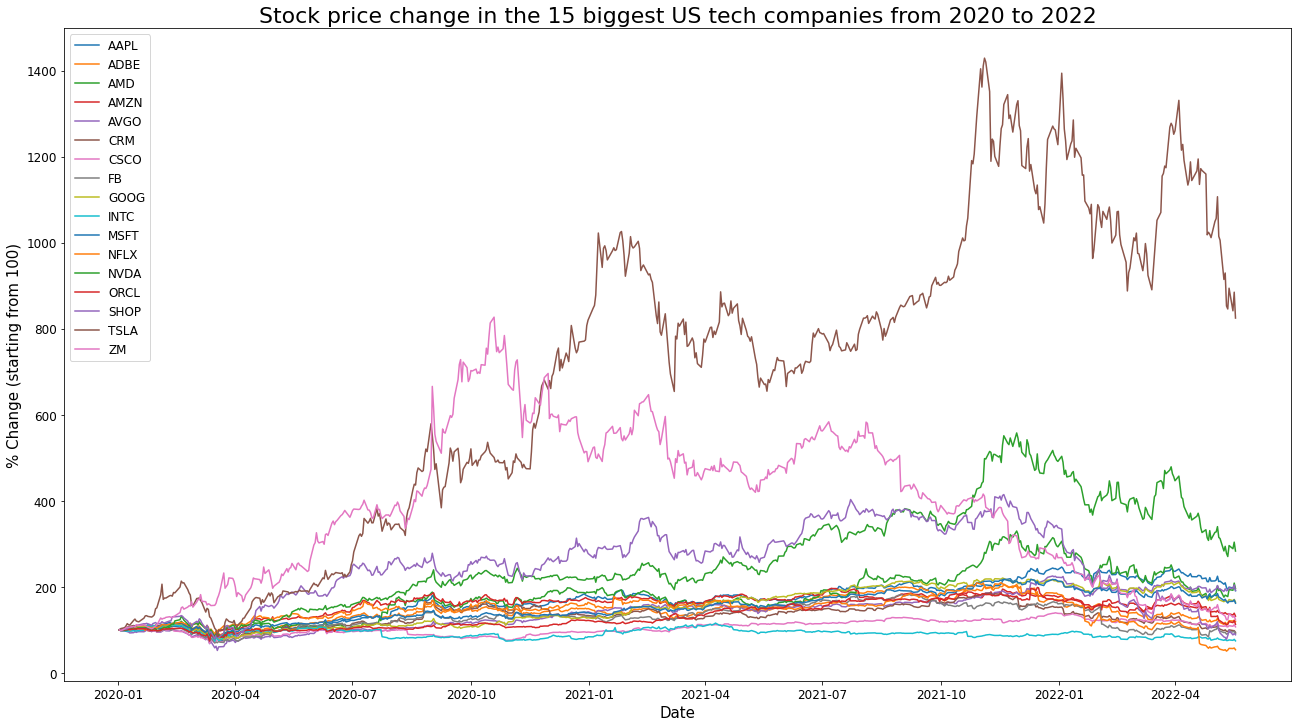

In [ ]:
# Plot a summary of the stock price change in the 15 biggest US tech companies from 2020 to 2022 
df_stock_US_summary = df_stock_US_index.drop(['NDX','SPY','FNGU'],axis=1)
plt.figure(figsize=(22,12))
plt.plot(df_stock_US_summary.index, df_stock_US_summary.values)
plt.title('Stock price change in the 15 biggest US tech companies from 2020 to 2022', fontsize=22)
plt.legend(df_stock_US_summary.columns, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel('% Change (starting from 100)', fontsize=15)
plt.show()

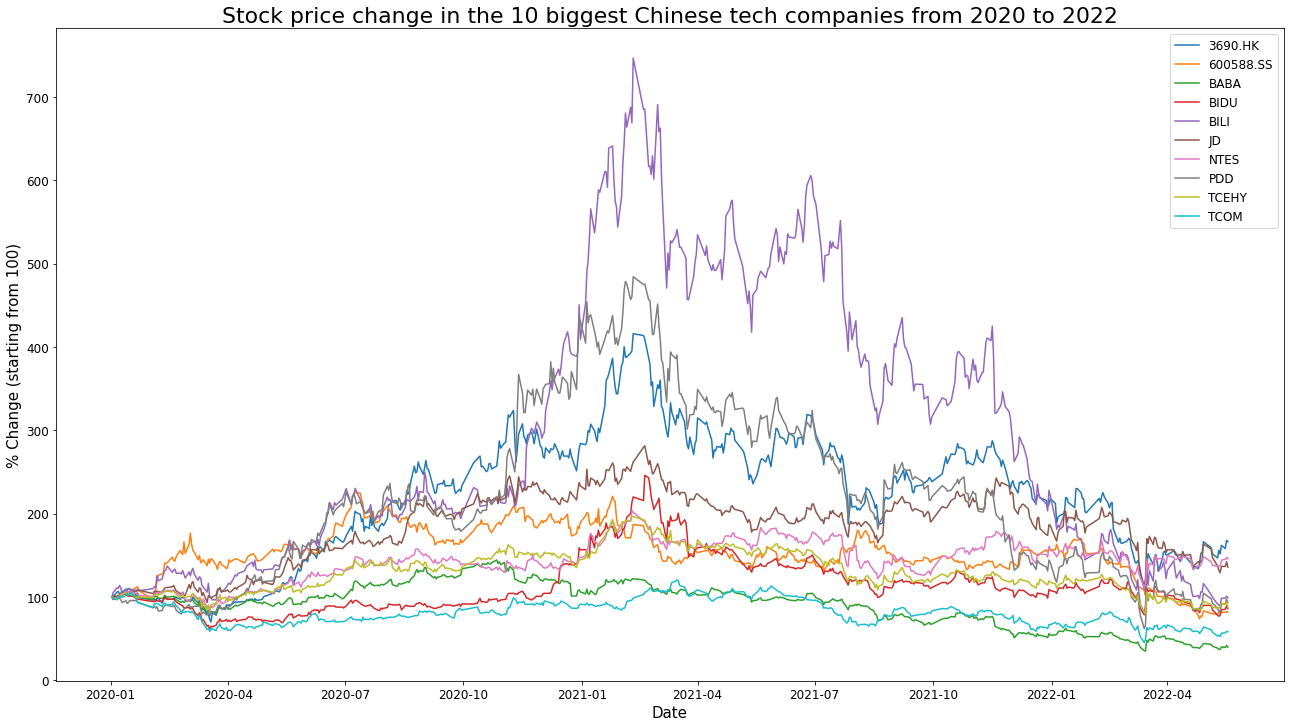

In [ ]:
df_stock_China_summary = df_stock_China_index.drop(['FXI','KWEB'],axis=1)
plt.figure(figsize=(22,12))
plt.plot(df_stock_China_summary.index, df_stock_China_summary.values)
plt.title('Stock price change in the 10 biggest Chinese tech companies from 2020 to 2022', fontsize=22)
plt.legend(df_stock_China_summary.columns, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel('% Change (starting from 100)', fontsize=15)
plt.show()

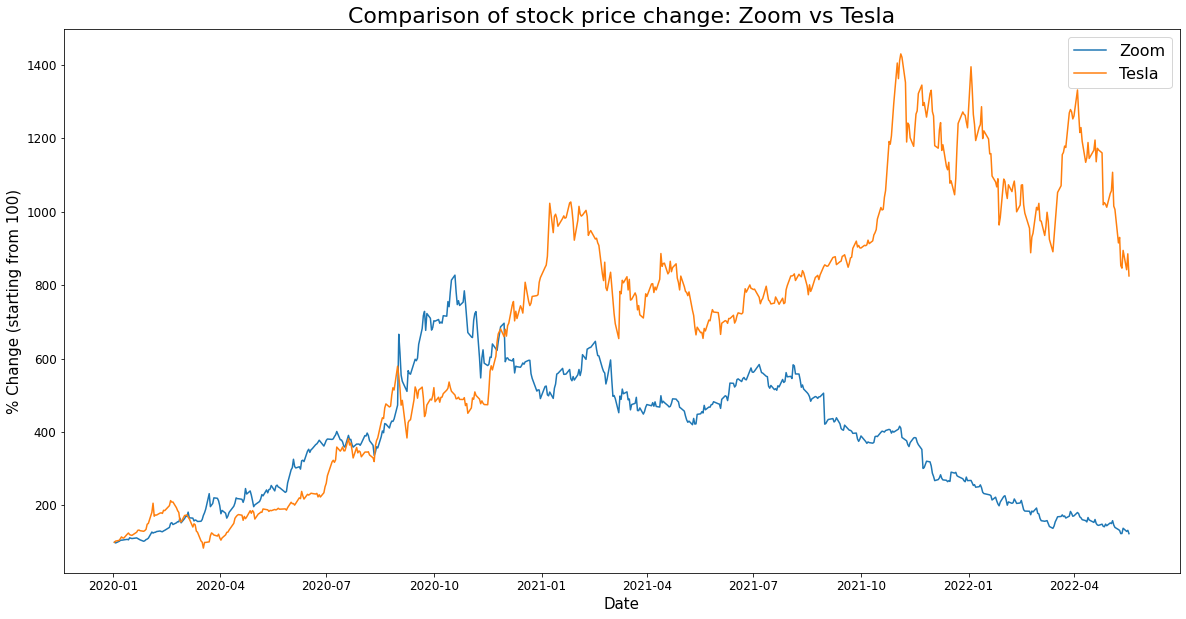

In [ ]:
# Plot the comparison of stock price change between Zoom and Tesla
plt.figure(figsize=(20,10))
for stock in ['ZM','TSLA']:
    plt.plot(df_stock_US_index.index,stock,data=df_stock_US_index)
plt.title('Comparison of stock price change: Zoom vs Tesla', fontsize=22)
plt.legend(['Zoom','Tesla'], fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel('% Change (starting from 100)', fontsize=15)
plt.show()

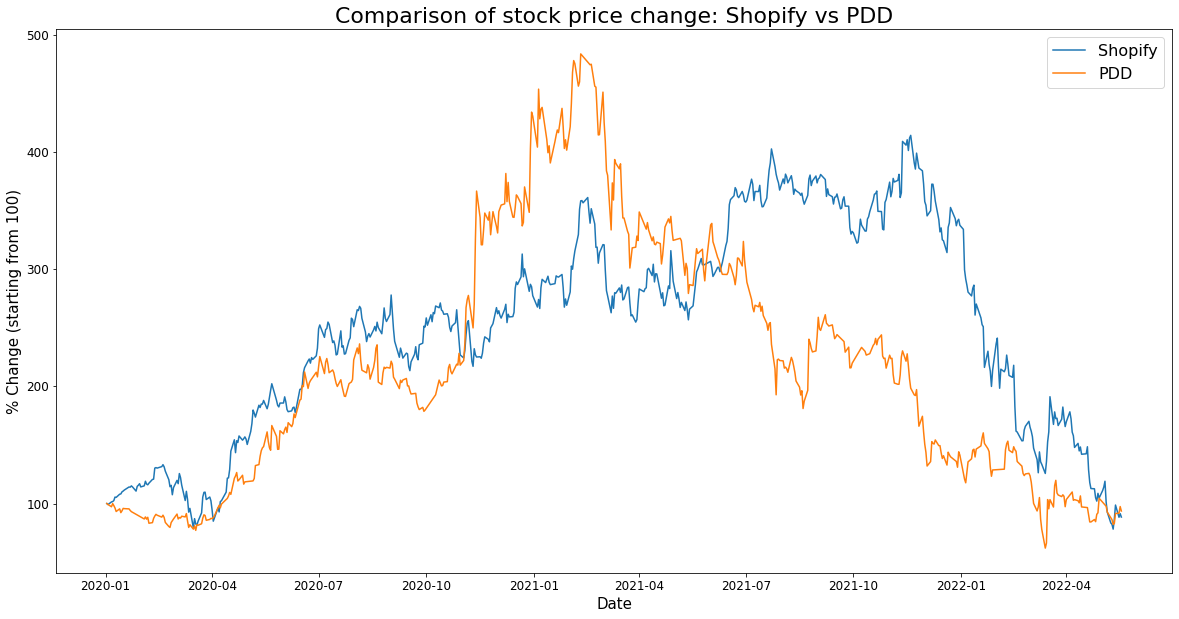

In [ ]:
# Plot the comparison of stock price change between Shopify and PDD
plt.figure(figsize=(20,10))
plt.plot(df_stock_US_index.index,'SHOP',data=df_stock_US_index)
plt.plot(df_stock_China_index.index,'PDD',data=df_stock_China_index)
plt.title('Comparison of stock price change: Shopify vs PDD' , fontsize=22)
plt.legend(['Shopify','PDD'], fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel('% Change (starting from 100)', fontsize=15)
plt.show()

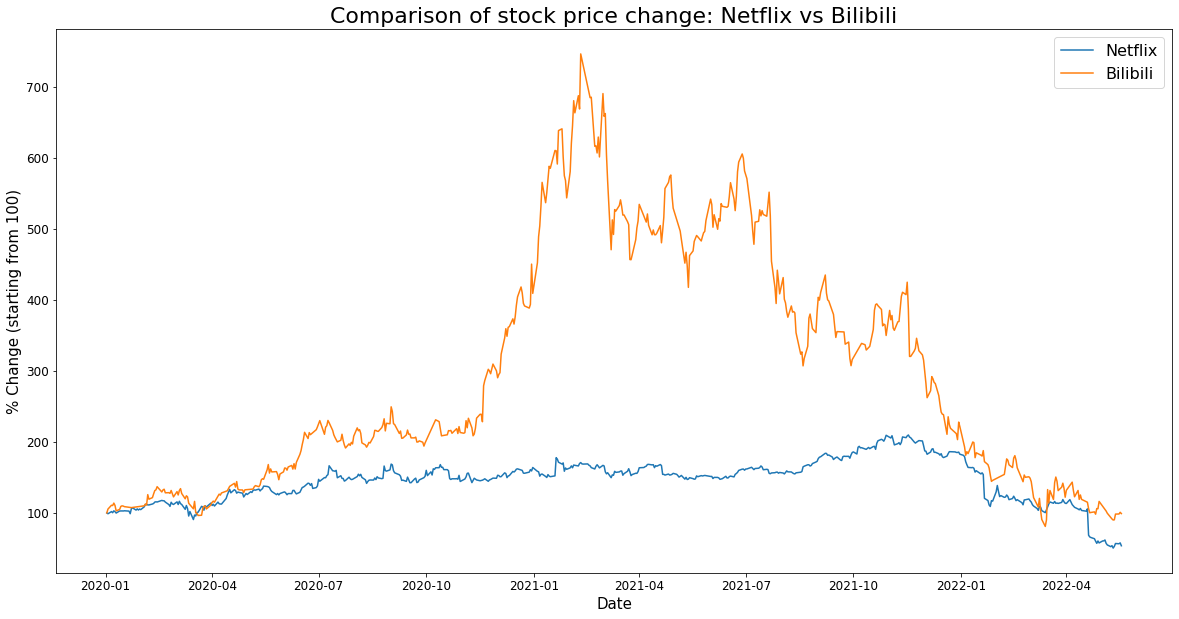

In [ ]:
# Plot the comparison of stock price change between Netflix and Bilibili 
plt.figure(figsize=(20,10))
plt.plot(df_stock_US_index.index,'NFLX',data=df_stock_US_index)
plt.plot(df_stock_China_index.index,'BILI',data=df_stock_China_index)
plt.title('Comparison of stock price change: Netflix vs Bilibili' , fontsize=22)
plt.legend(['Netflix','Bilibili'], fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel('% Change (starting from 100)', fontsize=15)
plt.show()

## Comparison of COVID-19 new cases and the largest tech stock prices in the US and China from 2020 to 2022

Used matplotlib to plot the linechart of COVID-19 New cases and stock prices of US top tech companies from 2020 to 2022, with different left and right scales (indicated with green and brown colors respectively). In which, Axes.twinx method from matplotlib library is used. Similarly, a line chart showing the relationship of COVID-19 new cases and the largest tech stock prices in China is plotted as following. In the first graph (US market), the market prices of NASDAQ 100 index - NDX (which is a collection of the largest 100 non-financial companies in the world), and Netflix have been increasing slowing ranging from -100% to +250%. It revealed that COVID-19 pandemic has posed negative impact to the majority of US tech companies due to a multitude of reasons. Netflix, the world's largest streaming service, even started going downward since 2021 Dec, due to the keen competition in streaming market and saturated growth of subscriber in early 2022. Another ETF indicator called FNGU, which covered the 10 biggest American tech companies such as FAANG (Facebook, Amazon, Apple, Netflix, Google), has performed better than NASDAQ 100 index during the pandemic. But still, most of the prominent tech companies have been enduring the unprecendent challenge due to the supply chain issues. 

In comparison, two stocks namely Tesla and Zoom, have been undertakening a unwavering growth throughout these 2.5 years. Tesla has succeeded in these years owing to its wise business strategy and advanced technologies far ahead from others, whilst Zoom has been benefited due to the WFH policy in pandemic and the hybrid working mode nowadays. Zoom is a great example who enjoyed plenty of benefits from this pandemic and its growth was accelerating alongwith the pandemic. Still, it can't avoid the inevitability to move downward after 2022. 

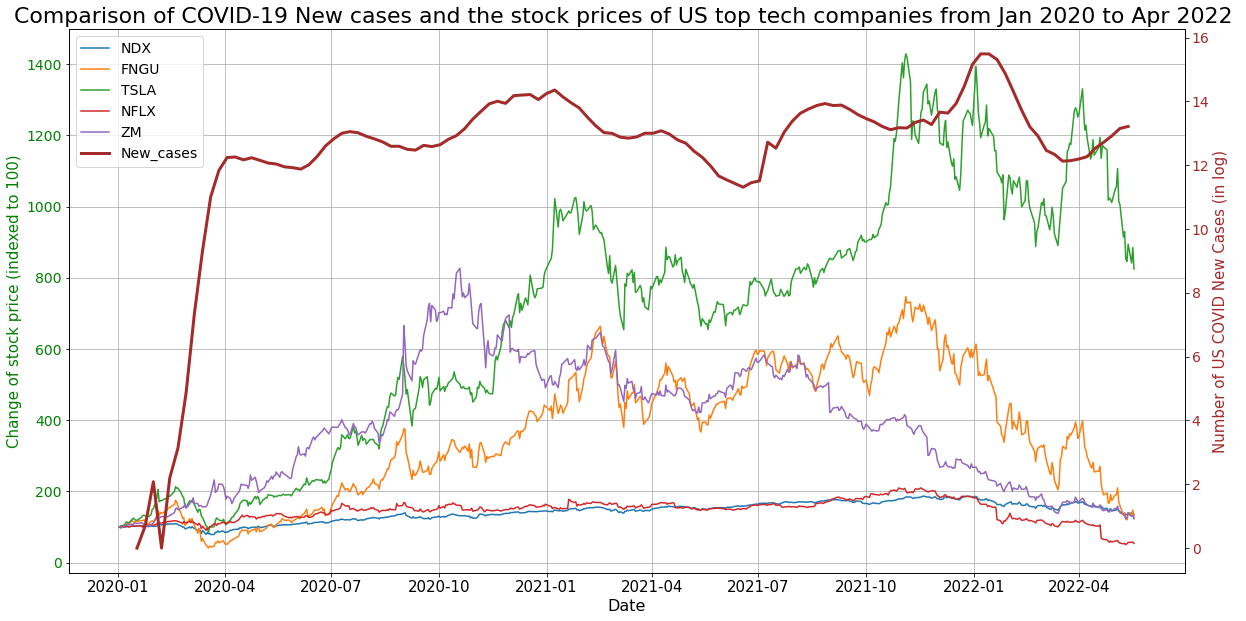

In [ ]:
# Plot with 2 different axes for US covid-19 new cases and stock prices
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
stock_list_US_COVID = ['NDX','FNGU','TSLA','NFLX','ZM']
for stock in stock_list_US_COVID:
    ax.plot(df_stock_US_index.index,stock,data=df_stock_US_index)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14,color='g')
# plt.legend(['NASDAQ 100','Netflix','Zoom','US COVID New Cases'], fontsize=12)

ax2 = plt.twinx()
ax2.plot(df_covid_US.index,'New_cases',data=df_covid_US, color='brown',linewidth=3)
plt.yticks(fontsize=14,color='brown')
plt.title('Comparison of COVID-19 New cases and the stock prices of US top tech companies from Jan 2020 to Apr 2022 ', fontsize=22)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)
ax.grid()
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Change of stock price (indexed to 100)", fontsize=15, color='g')
ax2.set_ylabel('Number of US COVID New Cases (in log)',fontsize=15, color='brown')

plt.show()

In the following graph (Chinese market), the market prices of iShares China Large-Cap ETF - FXI (which is designed to measure the performance of the largest companies in the Chinese equity market, including Alibaba, Tencent, Meituan, etc), Tencent, and Trip.com have been increasing slowing ranging from -100% to +200%. Similar to the US, it revealed that COVID-19 pandemic has also posed negative impact to the majority of Chinese tech companies. Trip.com, a Chinese multinational online travel company, is experiencing a slump in market due to the lower demand for travelling during the pandemic. In comparison, some stocks in specific industries are performing good during this pandemic, including Meituan, PDD, and Bilibili. Meituan is known as a prevalent food and grocery delivery company in China, while PDD is a emerging Chinese online shopping platform. Apparently, both industries have grabed the opportunities and enjoyed incredible advantages from this pandemic. Last but not least, Bilibili, a prevalent streaming service platform in China, had a jump and went beyond other growing companies during the pandemic. Its stock price reached to the peak as 700% in 2021 February, while PDD and Meituan arrived as 480% and 400% respectively. To conclude, it seems that the extent of company growth in Chinese stock market has been better than those in US stock market.

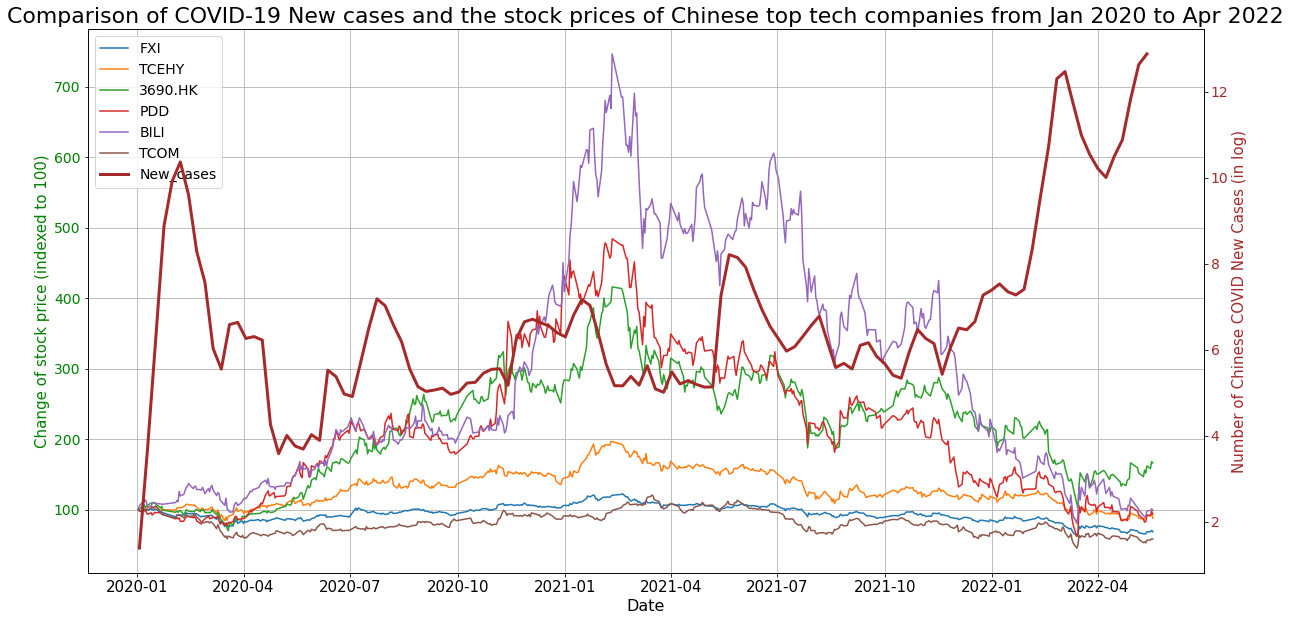

In [ ]:
# Plot with 2 different axes for China covid-19 new cases and stock prices
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
stock_list_China_COVID = ["FXI","TCEHY","3690.HK","PDD","BILI","TCOM"]
for stock in stock_list_China_COVID:
    ax.plot(df_stock_China_index.index,stock,data=df_stock_China_index)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14,color='g')

ax2 = plt.twinx()
ax2.plot(df_covid_China.index,'New_cases',data=df_covid_China, color='brown',linewidth=3)
plt.yticks(fontsize=14,color='brown')
plt.title('Comparison of COVID-19 New cases and the stock prices of Chinese top tech companies from Jan 2020 to Apr 2022', fontsize=22)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)
ax.grid()
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Change of stock price (indexed to 100)", fontsize=15, color='g')
ax2.set_ylabel('Number of Chinese COVID New Cases (in log)',fontsize=15, color='brown')

plt.show() 

## Explortary Data Analysis - Consumer Price Index (CPI)

Data source of US CPI: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23

Data source of China CPI: https://tradingeconomics.com/china/inflation-cpi 

In [ ]:
# read the dataset about China CPI data from csv. 
df_cpi_China = pd.read_csv('./Data/cpi-china.csv')
# transfer data type into DateTime 
df_cpi_China['dateInt']=df_cpi_China['Date'].astype(str) +'-01'
df_cpi_China['Date'] = pd.to_datetime(df_cpi_China['dateInt'])
df_cpi_China = df_cpi_China.drop(['dateInt'],axis=1)
df_cpi_China = df_cpi_China[df_cpi_China['Date'].dt.year>=2020]
df_cpi_China.head()

,Date,CPI
12,2020-01-01,5.4
13,2020-02-01,5.2
14,2020-03-01,4.3
15,2020-04-01,3.3
16,2020-05-01,2.4


In [ ]:
# read the dataset about the US CPI data from csv
df_cpi_US = pd.read_csv('./Data/CPI_US.csv')
# Select appropraite rows and columns from the dataframe 
df_cpi_US = df_cpi_US.iloc[545:,0:]
# Change column names and transfer data type into DateTime and float 
df_cpi_US.columns = ['Date','CPI']
df_cpi_US['Date'] = pd.to_datetime(df_cpi_US['Date'])
df_cpi_US['CPI'] = df_cpi_US['CPI'].astype(float)
df_cpi_US.head()

,Date,CPI
545,2020-01-01,1.8
546,2020-02-01,1.7
547,2020-03-01,1.5
548,2020-04-01,0.9
549,2020-05-01,0.7


In general, Consumer Price Index (CPI) measures the monthly change in prices paid by citizens, and it is one of the most widely used measures of inflation and deflation. Different countries uses different methdology and weighting to calculate CPI, where The U.S. Bureau of Labor Statistics (BLS) calculates the CPI as a weighted average of prices for a representative basket of goods and services. The linechart below illustrates the percentage change of Consumer Price Index (CPI) in US and China from Jan 2020 to Apr 2022. It shows that US had a lower CPI than China in 2020, and then it outpaced China since Oct 2020, and it is still increasing up to now. This revealed that the inflation rate in US is more severe than those in China currently, posing various of harm and risks to the US's economic. 

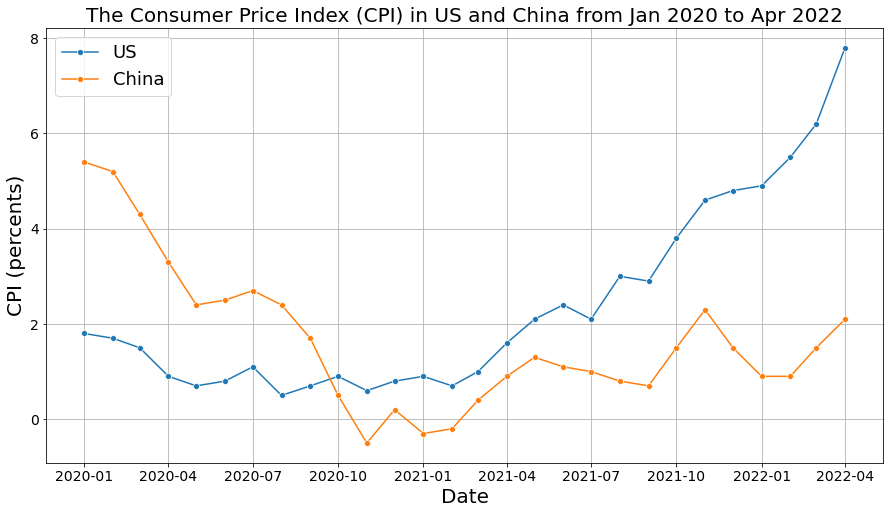

In [ ]:
# Use seaborn to plot the linechart of CPI in US and China from Jan 2020 to Apr 2022
plt.figure(figsize=(15,8))
sns.lineplot(x='Date',y='CPI',data=df_cpi_US, marker='o')
sns.lineplot(x='Date',y='CPI',data=df_cpi_China, marker='o')
plt.title("The Consumer Price Index (CPI) in US and China from Jan 2020 to Apr 2022", fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('CPI (percents)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['US','China'],fontsize=18)
plt.grid(True)
plt.show() 

## Explortary Data Analysis - Unemployment rate

Data source of US CPI: https://fred.stlouisfed.org/series/UNRATE

Data source of China CPI: https://tradingeconomics.com/china/unemployment-rate 

In [ ]:
# read the dataset about the US Unemployment data from csv
df_unemploy_US = pd.read_csv('./Data/unemployment_US.csv')
# Change column names, transfer data type, and select appropriate time interval
df_unemploy_US.columns = ['Date','Unemployment']
df_unemploy_US['Date'] = pd.to_datetime(df_unemploy_US['Date'])
df_unemploy_US = df_unemploy_US[df_unemploy_US['Date'].dt.year>=2020]
df_unemploy_US.head()

,Date,Unemployment
864,2020-01-01,3.5
865,2020-02-01,3.5
866,2020-03-01,4.4
867,2020-04-01,14.7
868,2020-05-01,13.2


In [ ]:
# read the dataset about China Unemployment data from csv
df_unemploy_China = pd.read_csv('./Data/unemployment_China.csv')
# Change column names, transfer data type, and select appropriate time interval
df_unemploy_China.columns = ['Date','Unemployment']
df_unemploy_China['Date'] = pd.to_datetime(df_unemploy_China['Date'],format='%d/%m/%Y')
df_unemploy_China = df_unemploy_China[df_unemploy_China['Date'].dt.year>=2020]
df_unemploy_China.head()

/Users/daniel/opt/miniconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Date,Unemployment
12,2020-01-01,5.3
13,2020-02-01,6.2
14,2020-03-01,5.9
15,2020-04-01,6.0
16,2020-05-01,5.9


Roughly speaking, a decreasing unemployment rate is associated with a growing economy, according to Okun's Law. Apparently, US has a higher unemployment rate than China between Apr 2020 to Aug 2021. The surge of US unemployment rate exposed the truth to us that US had been greatly impacted by the Covid-19 pandemic, and then following with a constantly decreasing or improving trend. In comparison, China has a stable unemployment rate even during the pandemic, ranging between 5 to 6%. It may be associated with the rapid government response and strict policy implementation, and thus its economy was not seriously affected. 

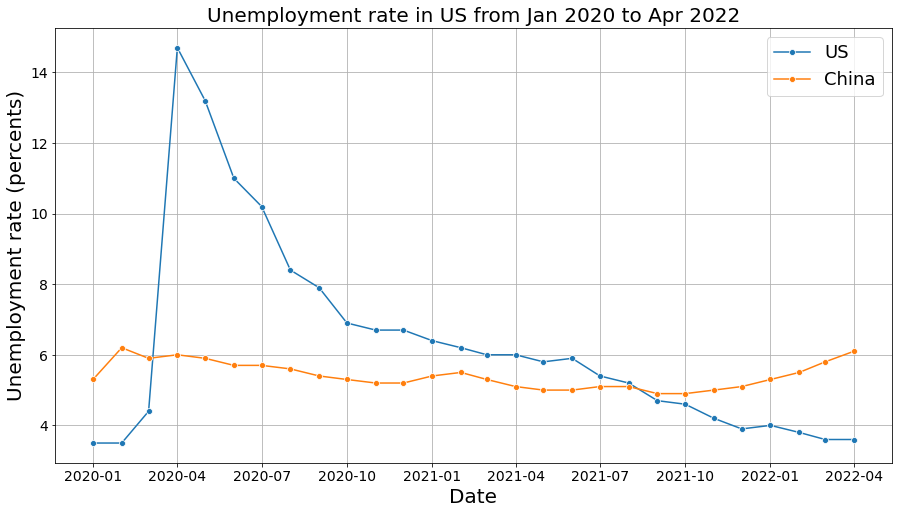

In [ ]:
# Use seaborn to plot the linechart of Unemployment in US and China from Jan 2020 to Apr 2022
plt.figure(figsize=(15,8))
sns.lineplot(x='Date',y='Unemployment',data=df_unemploy_US, marker='o')
sns.lineplot(x='Date',y='Unemployment',data=df_unemploy_China, marker='o')
plt.title("Unemployment rate in US from Jan 2020 to Apr 2022", fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Unemployment rate (percents)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['US','China'],fontsize=18)
plt.grid(True)
plt.show() 

## Comparison of the CPI, Unemployment rate and stock prices of US top tech companies from 2020 to 2022

According to Okun's law, there is a negative relationship between economy output and unemployment. While high inflation is generally considered harmful, some economists believe that a small amount of inflation can help drive economic growth. Roughly speaking, an increasing inflation rate (CPI) and decreasing unemployment rate could imply a healthy growing trend in in the country's economy. As shown in the graph, the US unemployment rate reached the peak at 15% and then dropped continuously since Apr 2020, while the CPI has been increasing constantly from Apr 2021. Hence, it is expected that US has a growing economy and the majority of stock prices should align with it. Interestingly, both NASDAQ 100 index and FNGU (10 biggest American tech companies) have been increasing upward from Apr 2020 to Dec 2021, and then dropped dramatically due to the gov policy factors (tapering and raising interest rates). 

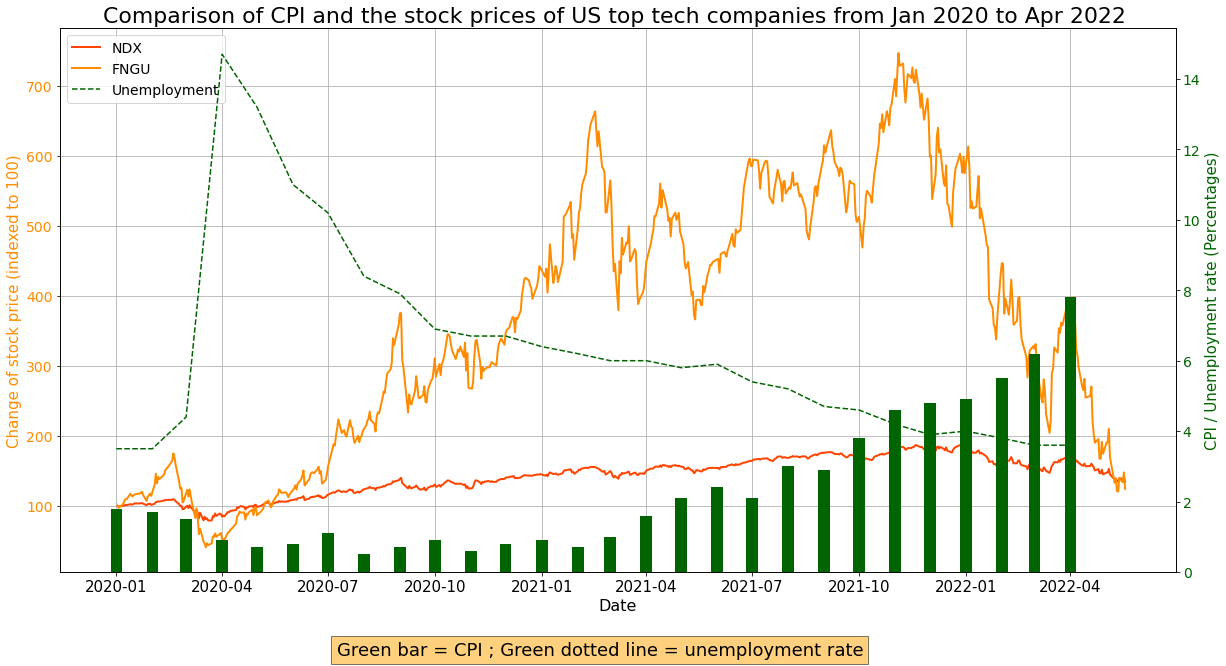

In [ ]:
# Use seaborn to plot the linechart of CPI in US and China from Jan 2020 to Apr 2022
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(df_stock_US_index.index,'NDX',data=df_stock_US_index,color='orangered',linewidth=2)
ax.plot(df_stock_US_index.index,'FNGU',data=df_stock_US_index,color='darkorange',linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14,color='darkorange')

ax2 = plt.twinx()
ax2.bar('Date','CPI',data=df_cpi_US,color='darkgreen',width=10)
ax2.plot('Date','Unemployment',data=df_unemploy_US, color='darkgreen',linestyle='--')
plt.yticks(fontsize=14,color='darkgreen')
plt.title('Comparison of CPI and the stock prices of US top tech companies from Jan 2020 to Apr 2022 ', fontsize=22)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)
ax.grid()
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Change of stock price (indexed to 100)", fontsize=15, color='darkorange')
ax2.set_ylabel('CPI / Unemployment rate (Percentages)',fontsize=15, color='darkgreen')

plt.figtext(0.5, 0.01, "Green bar = CPI ; Green dotted line = unemployment rate", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show() 

In opposite, China has a relative lower inflation rate (CPI) and higher unemployment rate, especially after Apr 2021. While the unemployment rate in China maintained constant between 5-6%, its CPI hit at rock bottom as a negative percertage (-1%) which imply a deflation environment for a short period of time. However, the stock market of Chinese top tech companies has gone quite well during the pandemic. As shown in the graph, two ETF namely FXI (cover an array of Chinese tech and financial companies) and KWEB (mainly composed of China Internet companies), have undertaken an incredible journey throughout the pandemic, reaching to the peaks at 120% and 190% at Feb 2021, and returned to only 60% and 75% at Apr 2022 respectively.  

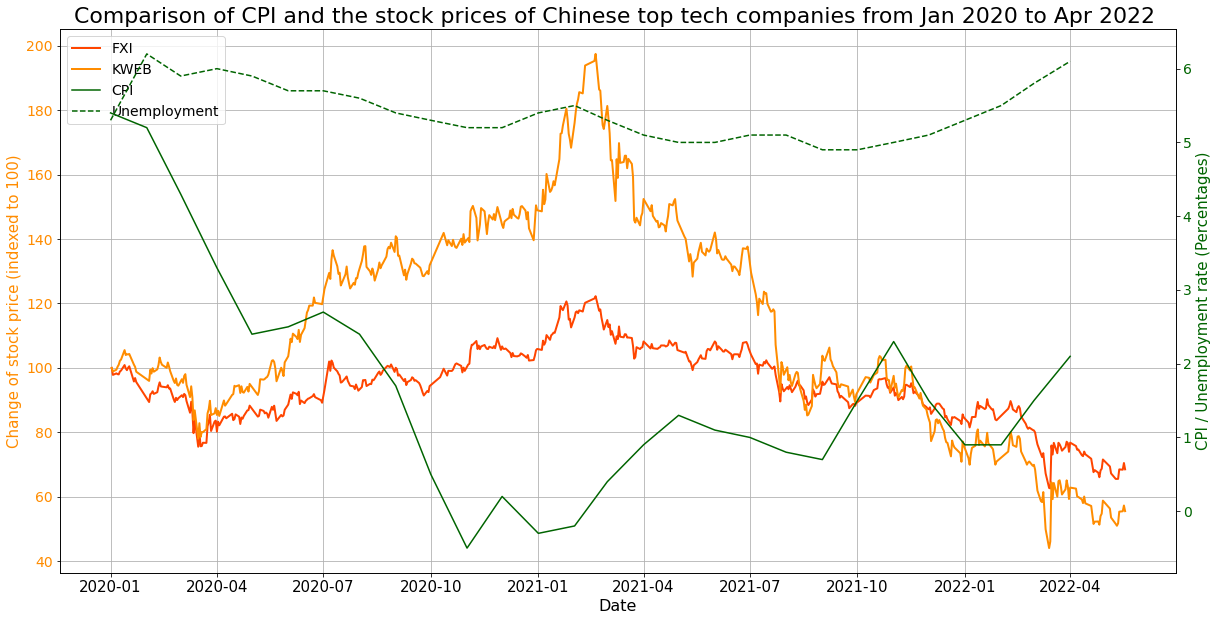

In [ ]:
# Use seaborn to plot the linechart of CPI in US and China from Jan 2020 to Apr 2022
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(df_stock_China_index.index,'FXI',data=df_stock_China_index,color='orangered',linewidth=2)
ax.plot(df_stock_China_index.index,'KWEB',data=df_stock_China_index,color='darkorange',linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14,color='darkorange')

ax2 = plt.twinx()
ax2.plot('Date','CPI',data=df_cpi_China,color='darkgreen')
ax2.plot('Date','Unemployment',data=df_unemploy_China, color='darkgreen',linestyle='--')
plt.yticks(fontsize=14,color='darkgreen')
plt.title('Comparison of CPI and the stock prices of Chinese top tech companies from Jan 2020 to Apr 2022 ', fontsize=22)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)
ax.grid()
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Change of stock price (indexed to 100)", fontsize=15, color='darkorange')
ax2.set_ylabel('CPI / Unemployment rate (Percentages)',fontsize=15, color='darkgreen')

plt.show() 

## Data merging 

Data merging has been done here. Found that 2020-01-01 was bank holiday, 2020-02-01, 2020-03-01, 2020-08-01 & 2020-11-01 were weekends, so has to do some data manipulation here...

### Merging US data

In [ ]:
# merging US covid data into US stock data
df_covid_US_merge = df[df['Country']=='United States of America']
df_covid_US_merge = df_covid_US_merge.drop(['Country','New_deaths'],axis=1)
df_covid_US_merge = df_covid_US_merge.set_index('Date_reported')
df_US = df_stock_US_index.join(df_covid_US_merge,how='left')
df_US = df_US.replace((np.inf,-np.inf,np.nan,-np.nan),0)

# merging US Covid-19 gov restriction data into US stock data
df_res_US_merge = df_res[df_res['Entity']=='United States'].drop(['Entity','Code'],axis=1).set_index('Date')
# Covid-19 restriction dataset has no data after 2022-05-04, so used inner join method to remove the null data between 2022-05-04 to 2022-05-18
df_US = df_US.join(df_res_US_merge,how='inner') 

# merging US CPI data on the new column Year_Month, removed null data in May 2022
df_cpi_US_merge = df_cpi_US.copy()
df_cpi_US_merge['Year_Month'] = df_cpi_US_merge['Date'].dt.year.astype(str) + df_cpi_US_merge['Date'].dt.month_name().str[0:3]
df_US['Date'] = df_US.index
df_US['Year_Month'] = df_US['Date'].dt.year.astype(str) + df_US['Date'].dt.month_name().str[0:3]
df_US = pd.merge(df_US,df_cpi_US_merge,on='Year_Month')

# merging US Unemployment data on the column Year_Month
df_unemploy_US_merge = df_unemploy_US.copy()
df_unemploy_US_merge['Year_Month'] = df_unemploy_US_merge['Date'].dt.year.astype(str) + df_unemploy_US_merge['Date'].dt.month_name().str[0:3]
df_US = pd.merge(df_US,df_unemploy_US_merge,on='Year_Month')
df_US = df_US.set_index(df_US['Date_x'])
df_US = df_US.drop(['Date_x','Date_y','Date'],axis=1)
df_US.index.rename('Date', inplace=True)
df_US


,AAPL,ADBE,AMD,AMZN,AVGO,CRM,CSCO,FB,FNGU,GOOG,...,ORCL,SHOP,SPY,TSLA,ZM,New_cases,restriction_gatherings,Year_Month,CPI,Unemployment
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0,2020Jan,1.8,3.5
2020-01-03,99.027801,99.216579,98.981670,98.786097,97.456484,99.508948,98.368443,99.470874,97.101669,99.509273,...,99.647807,99.136859,99.242783,102.963319,97.904537,0.0,0,2020Jan,1.8,3.5
2020-01-06,99.816880,99.784708,98.553973,100.256584,97.310704,103.868490,98.719557,101.344269,101.027448,101.962896,...,100.166798,101.353576,99.621396,104.945843,102.328286,0.0,0,2020Jan,1.8,3.5
2020-01-07,99.347438,99.689030,98.268842,100.466283,96.975731,105.395529,98.079318,101.563542,103.174364,101.899267,...,100.389249,101.640476,99.341292,109.017797,104.627474,0.0,0,2020Jan,1.8,3.5
2020-01-08,100.945564,101.028617,97.413449,99.681778,95.765984,106.191985,98.141265,102.593194,107.192146,102.702273,...,100.780220,102.523242,99.870728,114.382001,105.573344,0.0,0,2020Jan,1.8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,220.422888,123.777777,184.704695,153.923329,197.669733,104.539195,114.825361,89.136241,195.522162,180.273080,...,148.561922,112.603917,136.579300,1159.787102,149.068685,23361.0,2,2022Apr,7.8,3.6
2022-04-26,212.194928,119.343361,173.441968,146.881218,188.318846,101.850408,112.526208,86.257030,167.458982,174.796869,...,143.795117,104.972904,132.623850,1018.477157,143.131547,20962.0,2,2022Apr,7.8,3.6
2022-04-27,211.883676,118.978561,172.932803,145.591447,188.140641,104.605058,109.011146,83.396891,167.152274,168.236104,...,144.277599,102.057332,132.996759,1024.392216,142.054716,51169.0,2,2022Apr,7.8,3.6


### Merging China data

In [ ]:
# merging China covid data into US stock data
df_covid_China_merge = df[df['Country']=='China']
df_covid_China_merge = df_covid_China_merge.drop(['Country','New_deaths'],axis=1)
df_covid_China_merge = df_covid_China_merge.set_index('Date_reported')
df_China = df_stock_China_index.join(df_covid_China_merge,how='left')
df_China = df_China.replace((np.inf,-np.inf,np.nan,-np.nan),0)

# merging China Covid-19 gov restriction data into US stock data
df_res_China_merge = df_res[df_res['Entity']=='China'].drop(['Entity','Code'],axis=1).set_index('Date')
# Covid-19 restriction dataset has no data after 2022-05-04, so used inner join method to remove the null data between 2022-05-04 to 2022-05-18
df_China = df_China.join(df_res_China_merge,how='inner') 

# merging China CPI data on the new column Year_Month, removed null data in May 2022
df_cpi_China_merge = df_cpi_China.copy()
df_cpi_China_merge['Year_Month'] = df_cpi_China_merge['Date'].dt.year.astype(str) + df_cpi_China_merge['Date'].dt.month_name().str[0:3]
df_China['Date'] = df_China.index
df_China['Year_Month'] = df_China['Date'].dt.year.astype(str) + df_China['Date'].dt.month_name().str[0:3]
df_China = pd.merge(df_China,df_cpi_China_merge,on='Year_Month')

# merging China Unemployment data on the column Year_Month
df_unemploy_China_merge = df_unemploy_China.copy()
df_unemploy_China_merge['Year_Month'] = df_unemploy_China_merge['Date'].dt.year.astype(str) + df_unemploy_China_merge['Date'].dt.month_name().str[0:3]
df_China = pd.merge(df_China,df_unemploy_China_merge,on='Year_Month')
df_China = df_China.set_index(df_China['Date_x'])
df_China = df_China.drop(['Date_x','Date_y','Date'],axis=1)
df_China.index.rename('Date', inplace=True)
df_China

,3690.HK,600588.SS,BABA,BIDU,BILI,FXI,JD,KWEB,NTES,PDD,TCEHY,TCOM,New_cases,restriction_gatherings,Year_Month,CPI,Unemployment
Date,,,,,,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0,2020Jan,5.4,5.3
2020-01-03,100.676326,100.231334,98.739589,96.802201,105.393791,97.838679,100.689116,98.917241,98.770936,99.175357,98.295910,97.863130,0.0,0,2020Jan,5.4,5.3
2020-01-06,105.797101,101.288839,98.575782,98.350457,110.787581,98.306593,100.715610,99.439282,98.588394,97.235024,97.774651,96.537726,3.0,0,2020Jan,5.4,5.3
2020-01-07,106.666668,101.982823,99.026255,98.900301,110.405720,98.061489,101.563745,100.348027,99.796161,99.951491,99.799515,100.973764,0.0,0,2020Jan,5.4,5.3
2020-01-08,102.801934,101.321888,99.194611,99.717842,113.794746,97.994641,101.510735,100.986075,100.702794,98.229446,99.538897,99.729504,0.0,0,2020Jan,5.4,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,133.913049,77.493034,39.059014,84.336564,101.431977,67.518126,142.380072,52.359255,137.611445,86.344892,85.541114,58.479849,8070.0,4,2022Apr,2.1,6.1
2022-04-26,140.386476,73.624901,38.217225,80.979597,98.186152,66.083536,141.028355,51.360351,136.225521,84.501578,83.848025,56.018389,7383.0,4,2022Apr,2.1,6.1
2022-04-27,142.898545,77.058406,40.187468,85.747356,106.109779,68.189139,152.186588,54.024095,138.685925,90.759153,85.924076,58.615092,8361.0,4,2022Apr,2.1,6.1


In [ ]:
# save the merged dataframe into csv files for data modeling 
df_US.to_csv('./Data/df_US.csv',encoding='utf-8')
df_China.to_csv('./Data/df_China.csv',encoding='utf-8')